In [44]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
data = pd.read_csv('clean_data.csv', delimiter=',')
data.replace(to_replace='blues', value=0, inplace=True)
data.replace(to_replace='classical', value=1, inplace=True)
data.replace(to_replace='country', value=2, inplace=True)
data.replace(to_replace='disco', value=3, inplace=True)
data.replace(to_replace='hiphop', value=4, inplace=True)
data.replace(to_replace='jazz', value=5, inplace=True)
data.replace(to_replace='metal', value=6, inplace=True)
data.replace(to_replace='pop', value=7, inplace=True)
data.replace(to_replace='reggae', value=8, inplace=True)
data.replace(to_replace='rock', value=9, inplace=True)
#     data = data.sample(frac=1)
x_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1:]
print(x_data, y_data)

            0         1         2         3         4         5         6  \
0    0.082465  0.370680  0.976078  0.117917  0.163204  0.084427  0.373143   
1    0.055546  0.428353  0.965299  0.075727  0.131909  0.066827  0.267067   
2    0.075896  0.300847  0.976006  0.094128  0.217780  0.079480  0.377362   
3    0.032940  0.502821  0.965002  0.065287  0.114441  0.057618  0.249521   
4    0.100700  0.220039  0.914412  0.104886  0.211669  0.094203  0.535627   
5    0.093344  0.210984  0.973658  0.101970  0.165307  0.103073  0.378407   
6    0.072581  0.258729  0.975719  0.108756  0.165099  0.085676  0.323460   
7    0.061013  0.223714  0.986459  0.091520  0.130715  0.067435  0.267386   
8    0.063592  0.462670  0.966873  0.098485  0.155532  0.081071  0.332043   
9    0.078390  0.292462  0.939247  0.087166  0.156558  0.075770  0.362032   
10   0.062432  0.279316  0.962522  0.081940  0.219409  0.071963  0.431139   
11   0.043222  0.403545  0.967849  0.073950  0.116292  0.064440  0.232308   

In [46]:
print(data.columns.values)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28']


In [47]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.082465,0.370680,0.976078,0.117917,0.163204,0.084427,0.373143,0.123299,0.066024,0.522724,...,-0.035526,0.057015,-0.146590,0.110854,-0.139688,0.079803,-0.182687,-0.036017,-0.215541,0
1,0.055546,0.428353,0.965299,0.075727,0.131909,0.066827,0.267067,0.089464,0.059672,0.418901,...,0.166102,0.139892,-0.134813,0.260077,-0.174726,0.199382,-0.089437,-0.014359,-0.072977,0
2,0.075896,0.300847,0.976006,0.094128,0.217780,0.079480,0.377362,0.150209,0.053237,0.532151,...,-0.364532,0.191648,-0.095817,0.042082,-0.065723,0.216551,-0.122478,-0.018487,0.060442,0
3,0.032940,0.502821,0.965002,0.065287,0.114441,0.057618,0.249521,0.072822,0.038778,0.375007,...,-0.025160,0.192947,-0.140740,-0.066326,-0.082821,0.068979,-0.134911,0.102875,0.005058,0
4,0.100700,0.220039,0.914412,0.104886,0.211669,0.094203,0.535627,0.120346,0.078240,0.656242,...,-0.505872,0.203666,-0.298929,-0.140048,-0.191588,0.061897,-0.188283,-0.025549,-0.109223,0


In [48]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
995,0.088618,0.298999,0.996517,0.103595,0.145243,0.104156,0.338710,0.138974,0.071756,0.427859,...,0.081773,-0.037705,-0.008102,0.197897,-0.196930,-0.066698,-0.203657,0.053490,0.002912,9
996,0.097044,0.295255,0.994305,0.105787,0.190489,0.118135,0.346122,0.151722,0.068662,0.504614,...,0.046330,-0.010994,-0.076685,0.193124,-0.051390,-0.050995,-0.247948,0.183774,-0.075616,9
997,0.121163,0.345996,0.992120,0.156306,0.245842,0.135066,0.433651,0.212587,0.086205,0.506099,...,-0.210695,-0.000102,-0.038002,0.120442,0.101151,0.055324,-0.168384,0.050963,0.049345,9
998,0.048292,0.348624,0.992101,0.068655,0.107818,0.067799,0.223651,0.081415,0.042973,0.333107,...,0.257225,0.127660,0.015121,0.102178,-0.117984,-0.008489,-0.244068,0.111111,-0.092866,9
999,0.075695,0.433419,0.986361,0.098180,0.177123,0.084043,0.328388,0.135706,0.062945,0.451296,...,-0.074347,0.023712,0.200750,0.090999,-0.216224,-0.173326,-0.049137,0.194101,0.002319,9


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null int64
dtypes: float64(28), int64(1)
memory usage: 226.6 KB


In [50]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.102892,0.418016,0.951460,0.129812,0.201801,0.117739,0.357756,0.143330,0.088642,0.494379,...,-0.045807,0.047158,-0.059565,0.053185,-0.086532,0.059142,-0.076526,0.041923,-0.029553,4.500000
std,0.041698,0.110079,0.036734,0.050894,0.059898,0.048019,0.085006,0.046784,0.037924,0.088277,...,0.218303,0.188461,0.161237,0.158621,0.125214,0.121555,0.109575,0.109308,0.093644,2.873719
min,0.021366,0.151320,0.597298,0.040128,0.077781,0.038377,0.143970,0.047235,0.024574,0.270096,...,-0.881702,-0.671439,-0.949392,-0.589924,-0.601077,-0.353252,-0.553741,-0.488781,-0.558956,0.000000
25%,0.069562,0.341474,0.936603,0.090460,0.156964,0.080153,0.295032,0.108009,0.057755,0.433795,...,-0.190442,-0.070392,-0.150184,-0.056980,-0.164322,-0.011584,-0.147156,-0.017502,-0.086001,2.000000
50%,0.098797,0.419350,0.959824,0.123671,0.198330,0.111883,0.355001,0.140964,0.082324,0.493937,...,-0.039333,0.056421,-0.063637,0.056258,-0.081021,0.054422,-0.074523,0.045623,-0.027446,4.500000
75%,0.131244,0.500843,0.976568,0.163527,0.241637,0.147005,0.413954,0.173668,0.113898,0.552221,...,0.097753,0.162896,0.031836,0.151346,-0.004913,0.127389,-0.002772,0.112239,0.023636,7.000000
max,0.272984,0.728333,0.998376,0.342112,0.478379,0.459326,0.608197,0.299756,0.248074,0.798081,...,0.659063,0.921932,0.514915,0.555990,0.485425,0.701496,0.262860,0.412119,0.404580,9.000000


We have all numerical features here, so for 10 classes we can understand the relationship/distribution of values through histogram.

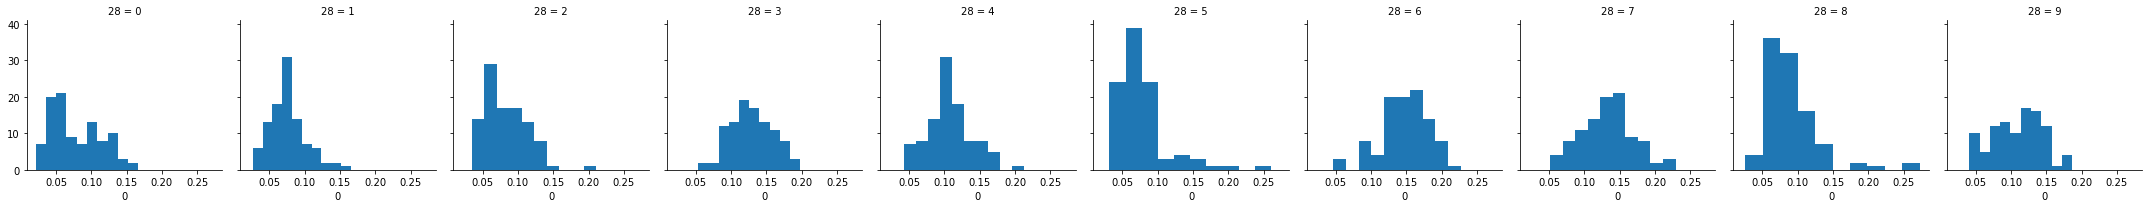

In [51]:
g = sns.FacetGrid(data, col='28')
for i in range(0,1):
    plt.figure(i)
    g.map(plt.hist, str(i))

In [52]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
x_data = data.iloc[:, :-1]
y_data = data.iloc[:, -1:]

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(x_data, y_data)
feature_importances = model.feature_importances_
# for i in range(len(feature_importances)):
#     print(i+1, feature_importances[i])
# sorted_array = np.sort(feature_importances)
for i in range(len(feature_importances)):
    print(i, feature_importances[i])

0 0.027621056999251027
1 0.038144762516247654
2 0.04295985613668642
3 0.03443139585289818
4 0.03486850932588424
5 0.03365968240554502
6 0.034949185308026744
7 0.029342871166555456
8 0.04228409247398064
9 0.04141183333252941
10 0.035877387321154475
11 0.022821535465252098
12 0.03412683487169995
13 0.05060944118173083
14 0.04647232880967476
15 0.05517164604860264
16 0.04435749681769577
17 0.031108588433044003
18 0.03850807682176457
19 0.029593607206749202
20 0.04229584362928684
21 0.03131944948283667
22 0.04218066114023942
23 0.027251612755850536
24 0.027484841388186947
25 0.026481320929298845
26 0.02495085546007704
27 0.02971522671925056


C:\Users\Mahesh.Bhosale\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(x_data)
# summarize components
print(f'Explained Variance:{fit.explained_variance_ratio_}')
print(fit.components_)

Explained Variance:[0.64448238 0.11959724 0.08978727 0.04750154 0.04372073 0.01552496
 0.00911222 0.00608851 0.00486311 0.00399197]
[[-1.94586386e-02 -3.92212768e-02 -7.36085004e-05 -2.37734532e-02
  -2.29567974e-02 -2.23490265e-02 -1.79798917e-02 -1.56873533e-02
  -1.70850897e-02 -2.66174520e-03 -1.87570042e-02 -2.29823468e-02
  -1.51307766e-02 -4.45746348e-01 -5.25044021e-01 -4.68004445e-01
   5.45316336e-01 -1.24117580e-02  4.55888280e-02  8.91076937e-03
   2.70315911e-02  1.36880557e-03  1.77831250e-02 -1.02178789e-02
   4.49222385e-03 -9.52330920e-03 -5.25809218e-03 -1.23056297e-02]
 [-1.03127763e-02  6.98299260e-03 -6.44900467e-03 -1.12624762e-02
  -1.80415696e-02 -7.23298149e-03 -4.00205951e-02 -2.33051913e-02
  -1.23058556e-02 -2.96438670e-02 -2.14419085e-02 -3.08218386e-02
  -4.52278349e-03  7.35308358e-01 -3.32680055e-02 -5.46187896e-01
   1.06525922e-01  3.61899175e-01 -3.40429507e-02  7.20780167e-02
  -1.48220052e-02  5.66001059e-02 -2.69219661e-02  2.56664046e-02
  -3.9355

In [81]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 27)
fit = rfe.fit(x_data,y_data)
print(f'Num Features: {fit.n_features_}')
print(f'Selected Features: {fit.support_}')
print(f'Feature Ranking: {fit.ranking_}')

Num Features: 27
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\Mahesh.Bhosale\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
new_data2 = x_data.iloc[:,fit.support_]

In [83]:
new_data2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.082465,0.370680,0.976078,0.117917,0.163204,0.084427,0.373143,0.123299,0.066024,0.522724,...,0.301607,-0.035526,0.057015,-0.146590,0.110854,-0.139688,0.079803,-0.182687,-0.036017,-0.215541
1,0.055546,0.428353,0.965299,0.075727,0.131909,0.066827,0.267067,0.089464,0.059672,0.418901,...,0.081479,0.166102,0.139892,-0.134813,0.260077,-0.174726,0.199382,-0.089437,-0.014359,-0.072977
2,0.075896,0.300847,0.976006,0.094128,0.217780,0.079480,0.377362,0.150209,0.053237,0.532151,...,0.131027,-0.364532,0.191648,-0.095817,0.042082,-0.065723,0.216551,-0.122478,-0.018487,0.060442
3,0.032940,0.502821,0.965002,0.065287,0.114441,0.057618,0.249521,0.072822,0.038778,0.375007,...,0.124815,-0.025160,0.192947,-0.140740,-0.066326,-0.082821,0.068979,-0.134911,0.102875,0.005058
4,0.100700,0.220039,0.914412,0.104886,0.211669,0.094203,0.535627,0.120346,0.078240,0.656242,...,0.256945,-0.505872,0.203666,-0.298929,-0.140048,-0.191588,0.061897,-0.188283,-0.025549,-0.109223
5,0.093344,0.210984,0.973658,0.101970,0.165307,0.103073,0.378407,0.108404,0.092062,0.548263,...,0.509746,-0.188004,0.388723,-0.291554,0.156524,-0.038224,0.220448,-0.162027,0.251917,-0.061878
6,0.072581,0.258729,0.975719,0.108756,0.165099,0.085676,0.323460,0.120793,0.056794,0.482954,...,0.551878,0.394479,0.392338,-0.309217,0.085119,-0.154496,0.166495,-0.182377,0.133984,-0.004165
7,0.061013,0.223714,0.986459,0.091520,0.130715,0.067435,0.267386,0.103919,0.062526,0.432138,...,0.466948,0.247623,0.438684,-0.315613,0.392292,-0.101066,0.196440,-0.095427,0.020882,-0.006567
8,0.063592,0.462670,0.966873,0.098485,0.155532,0.081071,0.332043,0.108152,0.063225,0.454046,...,0.372040,0.134746,0.153509,-0.201054,0.062869,-0.356202,0.067585,-0.012453,0.237613,-0.071847
9,0.078390,0.292462,0.939247,0.087166,0.156558,0.075770,0.362032,0.101153,0.073766,0.544528,...,0.778038,-0.299571,0.026277,-0.228379,0.157788,-0.299808,0.154479,-0.327351,-0.046961,-0.022433


In [84]:
new_data2['28']=y_data
new_data2.to_csv('new_data.csv')